In [1]:
from packaging import version
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

Predict Type: Rot_y
https://tensorboard.dev/experiment/GdPSPSVNTMSNDf6hgp5mFA

In [2]:
experiment_id = "GdPSPSVNTMSNDf6hgp5mFA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars(include_wall_time=True)
df

,run,tag,step,value,wall_time
0,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,0,1.472524,1.615886e+09
1,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,1,1.328204,1.615886e+09
2,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,2,1.192515,1.615887e+09
3,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,3,1.035916,1.615888e+09
4,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,4,0.893129,1.615888e+09
...,...,...,...,...,...
5395,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,82752,0.929591,1.624574e+09
5396,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,83614,0.923939,1.624575e+09
5397,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,84476,0.911226,1.624576e+09
5398,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,85338,0.932765,1.624577e+09


In [24]:
csv_path = 'dataframe.csv'
df.to_csv(csv_path, index=False)
print("done")

done


# Validation Accuracy

In [105]:
df_validaton = df[df.run.str.endswith("\\validation")]
df_validaton

,run,tag,step,value
200,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,0,1.424690
201,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,1,1.542513
202,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,2,1.292715
203,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,3,1.110816
204,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,4,0.908264
...,...,...,...,...
5395,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,82752,0.929591
5396,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,83614,0.923939
5397,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,84476,0.911226
5398,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,evaluation_orientation_accuracy_vs_iterations,85338,0.932765


In [106]:
print(df_validaton["run"].unique())
print(df_validaton["tag"].unique())

['pred_type-alpha\\alpha_2021-03-16-08-59-38_1615885178\\logs\\scalars\\validation'
 'pred_type-alpha\\multibin_2021-04-26-18-11-42_1619460702\\logs\\scalars\\validation'
 'pred_type-alpha\\rot_y_2021-03-17-03-27-39_1615951659\\logs\\scalars\\validation'
 'pred_type-alpha\\single_bin_2021-04-23-21-27-18_1619213238\\logs\\scalars\\validation'
 'pred_type-alpha\\tricosine_2021-03-15-15-53-50_1615823630\\logs\\scalars\\validation'
 'pred_type-alpha\\voting_bin_2021-04-25-04-39-12_1619325552\\logs\\scalars\\validation'
 'pred_type-rot_y\\multibin_2021-07-05-02-06-23_1625465183\\logs\\scalars\\validation'
 'pred_type-rot_y\\rot_y_2021-06-21-23-53-15_1624333995\\logs\\scalars\\validation'
 'pred_type-rot_y\\single_bin_2021-06-25-00-53-57_1624596837\\logs\\scalars\\validation'
 'pred_type-rot_y\\tricosine_2021-06-23-00-59-28_1624424368\\logs\\scalars\\validation'
 'pred_type-rot_y\\voting_bin_2021-06-23-23-18-00_1624504680\\logs\\scalars\\validation']
['epoch_loss' 'epoch_orientation_accuracy

In [107]:
# split dataframe into alpha and rot_y
val_alpha_run = df_validaton[df_validaton['run'].str.contains("pred_type-alpha")]
val_rot_y_run = df_validaton[df_validaton['run'].str.contains("pred_type-rot_y")]

### Processing Alpha (predcition type) Data

In [108]:
val_alpha_run["tag"].unique()

array(['epoch_loss', 'epoch_orientation_accuracy'], dtype=object)

In [109]:
acc_all_orien = val_alpha_run[val_alpha_run['tag'] == 'epoch_orientation_accuracy']
acc_converter_type = acc_all_orien.run.apply(lambda run: run.split("\\")[1])

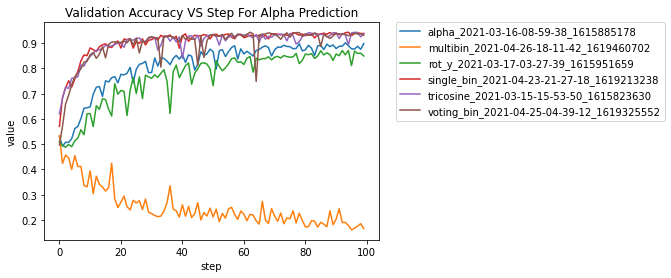

In [110]:
sns.lineplot(data=acc_all_orien, x="step", y="value", hue= acc_converter_type).set_title("Validation Accuracy VS Step For Alpha Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Processing Rot_Y (predcition type) Data

In [111]:
val_rot_y_run["tag"].unique()

array(['epoch_loss', 'epoch_orientation_accuracy',
       'evaluation_loss_vs_iterations',
       'evaluation_orientation_accuracy_vs_iterations'], dtype=object)

In [112]:
_acc_all_orien = val_rot_y_run[val_rot_y_run['tag'] == 'epoch_orientation_accuracy']
_acc_converter_type = _acc_all_orien.run.apply(lambda run: run.split("\\")[1])

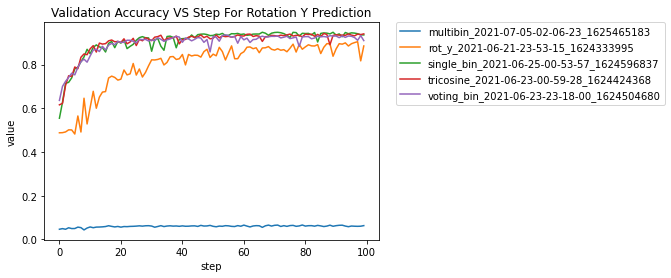

In [113]:
sns.lineplot(data=_acc_all_orien, x="step", y="value", hue= _acc_converter_type).set_title("Validation Accuracy VS Step For Rotation Y Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




# Training Accuracy

In [114]:
df_train = df[df.run.str.endswith("\\train")]

In [115]:
# split dataframe into alpha and rot_y
train_alpha_run = df_train[df_train['run'].str.contains("pred_type-alpha")]
train_rot_y_run = df_train[df_train['run'].str.contains("pred_type-rot_y")]

### Processing Alpha (predcition type) Data

In [116]:
train_alpha_run["tag"].unique()

array(['epoch_loss', 'epoch_orientation_accuracy'], dtype=object)

In [117]:
train_all_orien = train_alpha_run[train_alpha_run['tag'] == 'epoch_orientation_accuracy']
train_converter_type = train_all_orien.run.apply(lambda run: run.split("\\")[1])

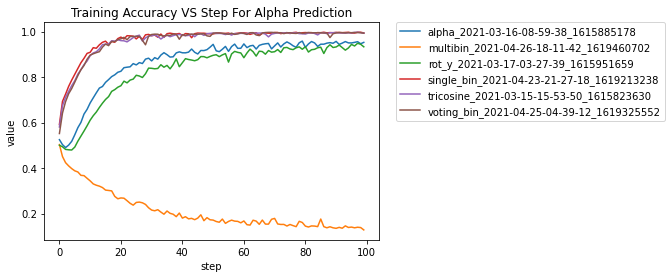

In [118]:
sns.lineplot(data=train_all_orien, x="step", y="value", hue= train_converter_type).set_title("Training Accuracy VS Step For Alpha Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Processing Rot_Y (predcition type) Data

In [119]:
_train_all_orien = train_rot_y_run[train_rot_y_run['tag'] == 'epoch_orientation_accuracy']
_train_converter_type = _train_all_orien.run.apply(lambda run: run.split("\\")[1])

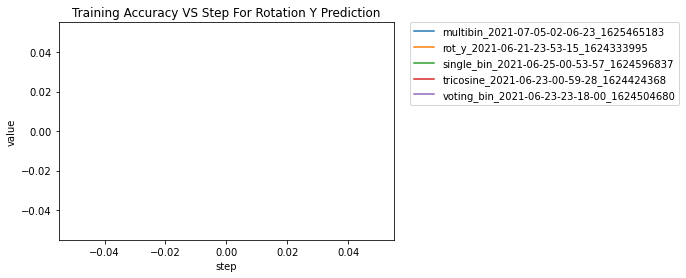

In [120]:
sns.lineplot(data=_acc_all_orien, x="step", y="value", hue= _train_converter_type).set_title("Training Accuracy VS Step For Rotation Y Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [121]:
_train_converter_type


2500      multibin_2021-07-05-02-06-23_1625465183
2501      multibin_2021-07-05-02-06-23_1625465183
2502      multibin_2021-07-05-02-06-23_1625465183
2503      multibin_2021-07-05-02-06-23_1625465183
2504      multibin_2021-07-05-02-06-23_1625465183
                          ...                    
4995    voting_bin_2021-06-23-23-18-00_1624504680
4996    voting_bin_2021-06-23-23-18-00_1624504680
4997    voting_bin_2021-06-23-23-18-00_1624504680
4998    voting_bin_2021-06-23-23-18-00_1624504680
4999    voting_bin_2021-06-23-23-18-00_1624504680
Name: run, Length: 500, dtype: object

In [122]:
train_rot_y_run

,run,tag,step,value
2400,pred_type-rot_y\multibin_2021-07-05-02-06-23_1...,epoch_loss,0,0.851828
2401,pred_type-rot_y\multibin_2021-07-05-02-06-23_1...,epoch_loss,1,0.705646
2402,pred_type-rot_y\multibin_2021-07-05-02-06-23_1...,epoch_loss,2,0.647702
2403,pred_type-rot_y\multibin_2021-07-05-02-06-23_1...,epoch_loss,3,0.595084
2404,pred_type-rot_y\multibin_2021-07-05-02-06-23_1...,epoch_loss,4,0.564489
...,...,...,...,...
4995,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,epoch_orientation_accuracy,95,0.988377
4996,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,epoch_orientation_accuracy,96,0.988095
4997,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,epoch_orientation_accuracy,97,0.988846
4998,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,epoch_orientation_accuracy,98,0.989639


Training time

In [9]:
all_training_data = df[df['run'].str.contains("train")]
all_training_data = all_training_data[all_training_data['tag'] == 'epoch_loss']
all_training_data

,run,tag,step,value,wall_time
0,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,0,1.472524,1.615886e+09
1,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,1,1.328204,1.615886e+09
2,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,2,1.192515,1.615887e+09
3,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,3,1.035916,1.615888e+09
4,pred_type-alpha\alpha_2021-03-16-08-59-38_1615...,epoch_loss,4,0.893129,1.615888e+09
...,...,...,...,...,...
4895,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,epoch_loss,95,0.013821,1.624574e+09
4896,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,epoch_loss,96,0.015237,1.624575e+09
4897,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,epoch_loss,97,0.013315,1.624576e+09
4898,pred_type-rot_y\voting_bin_2021-06-23-23-18-00...,epoch_loss,98,0.012063,1.624577e+09


In [20]:
training_time = {}
for converter_type in all_training_data['run'].unique():
    train_instace_name = converter_type.split("\\")[:2]
    train_instace_name[1] = train_instace_name[1].split('_')[:-2]
    print(train_instace_name)
    training_time[str(converter_type.split("\\")[:2])] = None

['pred_type-alpha', ['alpha']]
['pred_type-alpha', ['multibin']]
['pred_type-alpha', ['rot', 'y']]
['pred_type-alpha', ['single', 'bin']]
['pred_type-alpha', ['tricosine']]
['pred_type-alpha', ['voting', 'bin']]
['pred_type-rot_y', ['multibin']]
['pred_type-rot_y', ['rot', 'y']]
['pred_type-rot_y', ['single', 'bin']]
['pred_type-rot_y', ['tricosine']]
['pred_type-rot_y', ['voting', 'bin']]


# Export CSV file

In [60]:
def clean_data(input_df, csv_name):
    # remove accuracy tag and wall time columns
    input_df = input_df.drop(columns=['tag', 'wall_time'])
    # remove data in "run" columns
    input_df['run'] = input_df['run'].str.extract(r'(pred_type-\w+\\\w+_*\w*)_')
    cleaned_df= pd.pivot_table(input_df, values = 'value', index = 'step', columns= 'run')
    # export to csv
    cleaned_df.to_csv(csv_name, index=True)
    print("Finish Exporting ", csv_name)

In [61]:
df_acc = df[df['tag'] == 'epoch_orientation_accuracy']
df_loss = df[df['tag'] == 'epoch_loss']

val_acc = df_acc[df.run.str.endswith("\\validation")]
train_acc = df_acc[df.run.str.endswith("\\train")]
val_loss = df_loss[df.run.str.endswith("\\validation")]
train_loss = df_loss[df.run.str.endswith("\\train")]

C:\Users\Tuge\AppData\Local\Temp/ipykernel_15808/48011697.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_acc = df_acc[df.run.str.endswith("\\validation")]
C:\Users\Tuge\AppData\Local\Temp/ipykernel_15808/48011697.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_acc = df_acc[df.run.str.endswith("\\train")]
C:\Users\Tuge\AppData\Local\Temp/ipykernel_15808/48011697.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_loss = df_loss[df.run.str.endswith("\\validation")]
C:\Users\Tuge\AppData\Local\Temp/ipykernel_15808/48011697.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_loss = df_loss[df.run.str.endswith("\\train")]


In [62]:
# check if asssignment is successful.
val_acc
val_acc['run'].iloc[0]

'pred_type-alpha\\alpha_2021-03-16-08-59-38_1615885178\\logs\\scalars\\validation'

In [63]:
process_queue = [[val_acc, "cleaned_validation_accuracy.csv"],
                 [train_acc, 'cleaned_training_accuracy.csv'],
                 [val_loss, "cleaned_validation_loss.csv"],
                 [train_loss, "cleaned_training_loss.csv"]]
for (dataframe, export_file_name) in process_queue:
    clean_data(dataframe, export_file_name)
print("Finish Processing Queue")



Finish Exporting  cleaned_validation_accuracy.csv
Finish Exporting  cleaned_training_accuracy.csv
Finish Exporting  cleaned_validation_loss.csv
Finish Exporting  cleaned_training_loss.csv
Finish Processing Queue


In [1]:
import pandas as pd
import os
import tensorboard as tb

experiment_id = "JfMZJUwdReC8FPp83s3RDg"
csv_file_dir = 'csv_output'
csv_file_prefix = 'pos_enc'
def clean_data(input_df, csv_name):
    # remove accuracy tag and wall time columns
    input_df = input_df.drop(columns=['tag', 'wall_time'])
    # remove data in "run" columns
    print(input_df['run'])
    input_df['run'] = input_df['run'].str.extract(r'(\D*)_\d\d\d\d')
    cleaned_df= pd.pivot_table(input_df, values = 'value', index = 'step', columns= 'run')
    # export to csv
    cleaned_df.to_csv(os.path.join(csv_file_dir, csv_file_prefix+"_"+csv_name), index=True)
    print("Finish Exporting ", csv_name)

In [2]:
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars(include_wall_time=True)
# split into loss and accuracy datafram
df_acc = df[df['tag'] == 'epoch_orientation_accuracy']
df_loss = df[df['tag'] == 'epoch_loss']
# further split into validation accuracy, training accuracy, validation loss and training loss
val_acc = df_acc[df.run.str.endswith("\\validation")]
train_acc = df_acc[df.run.str.endswith("\\train")]
val_loss = df_loss[df.run.str.endswith("\\validation")]
train_loss = df_loss[df.run.str.endswith("\\train")]

process_queue = [[val_acc, "cleaned_validation_accuracy.csv"],
                 [train_acc, 'cleaned_training_accuracy.csv'],
                 [val_loss, "cleaned_validation_loss.csv"],
                 [train_loss, "cleaned_training_loss.csv"]]
for (dataframe, export_file_name) in process_queue:
    clean_data(dataframe, export_file_name)
print("Finish Processing Queue")

300     alpha_single_bin_with_pos_enc_2021-07-22-15-11...
301     alpha_single_bin_with_pos_enc_2021-07-22-15-11...
302     alpha_single_bin_with_pos_enc_2021-07-22-15-11...
303     alpha_single_bin_with_pos_enc_2021-07-22-15-11...
304     alpha_single_bin_with_pos_enc_2021-07-22-15-11...
                              ...                        
1851    rot-y_tricosine_with_pos_enc_2021-07-20-01-07-...
1852    rot-y_tricosine_with_pos_enc_2021-07-20-01-07-...
1853    rot-y_tricosine_with_pos_enc_2021-07-20-01-07-...
1854    rot-y_tricosine_with_pos_enc_2021-07-20-01-07-...
1855    rot-y_tricosine_with_pos_enc_2021-07-20-01-07-...
Name: run, Length: 369, dtype: object
Finish Exporting  cleaned_validation_accuracy.csv
100     alpha_single_bin_with_pos_enc_2021-07-22-15-11...
101     alpha_single_bin_with_pos_enc_2021-07-22-15-11...
102     alpha_single_bin_with_pos_enc_2021-07-22-15-11...
103     alpha_single_bin_with_pos_enc_2021-07-22-15-11...
104     alpha_single_bin_with_pos_enc_2021

C:\Users\Tuge\AppData\Local\Temp/ipykernel_41612/2686545541.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_acc = df_acc[df.run.str.endswith("\\validation")]
C:\Users\Tuge\AppData\Local\Temp/ipykernel_41612/2686545541.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_acc = df_acc[df.run.str.endswith("\\train")]
C:\Users\Tuge\AppData\Local\Temp/ipykernel_41612/2686545541.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_loss = df_loss[df.run.str.endswith("\\validation")]
C:\Users\Tuge\AppData\Local\Temp/ipykernel_41612/2686545541.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_loss = df_loss[df.run.str.endswith("\\train")]
